In [1]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 2. Extract Dataset
import zipfile
import os

zip_path = "/content/drive/MyDrive/ml_pr.zip"  # 🔁 Change path if needed
extract_path = "/content/dataset2"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted!")


✅ Dataset extracted!


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Detected 11 classes: {'Bread': 0, 'Dairy product': 1, 'Dessert': 2, 'Egg': 3, 'Fried food': 4, 'Meat': 5, 'Noodles-Pasta': 6, 'Rice': 7, 'Seafood': 8, 'Soup': 9, 'Vegetable-Fruit': 10}
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 7,302,731 (27.86 MB)

 Trainable params: 265,227 (1.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.2748 - loss: 2.2227

309/309 ━━━━━━━━━━━━━━━━━━━━ 224s 631ms/step - accuracy: 0.2752 - loss: 2.2216 - val_accuracy: 0.6685 - val_loss: 1.0899
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.5726 - loss: 1.2847

309/309 ━━━━━━━━━━━━━━━━━━━━ 157s 509ms/step - accuracy: 0.5727 - loss: 1.2845 - val_accuracy: 0.7353 - val_loss: 0.8338
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.6473 - loss: 1.0621

309/309 ━━━━━━━━━━━━━━━━━━━━ 154s 499ms/step - accuracy: 0.6473 - loss: 1.0621 - val_accuracy: 0.7770 - val_loss: 0.7158
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.6844 - loss: 0.9577

309/309 ━━━━━━━━━━━━━━━━━━━━ 157s 506ms/step - accuracy: 0.6844 - loss: 0.9577 - val_accuracy: 0.7883 - val_loss: 0.6623
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.6952 - loss: 0.8979

309/309 ━━━━━━━━━━━━━━━━━━━━ 156s 504ms/step - accuracy: 0.6953 - loss: 0.8979 - val_accuracy: 0.8000 - val_loss: 0.6305
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.7155 - loss: 0.8462

309/309 ━━━━━━━━━━━━━━━━━━━━ 157s 509ms/step - accuracy: 0.7155 - loss: 0.8462 - val_accuracy: 0.8029 - val_loss: 0.6059
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.7321 - loss: 0.8017

309/309 ━━━━━━━━━━━━━━━━━━━━ 203s 511ms/step - accuracy: 0.7321 - loss: 0.8018 - val_accuracy: 0.8093 - val_loss: 0.5891
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.7389 - loss: 0.7813

309/309 ━━━━━━━━━━━━━━━━━━━━ 200s 506ms/step - accuracy: 0.7389 - loss: 0.7813 - val_accuracy: 0.8190 - val_loss: 0.5747
Epoch 9/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.7371 - loss: 0.7865

309/309 ━━━━━━━━━━━━━━━━━━━━ 200s 498ms/step - accuracy: 0.7371 - loss: 0.7865 - val_accuracy: 0.8187 - val_loss: 0.5711
Epoch 10/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.7472 - loss: 0.7434

309/309 ━━━━━━━━━━━━━━━━━━━━ 161s 522ms/step - accuracy: 0.7472 - loss: 0.7434 - val_accuracy: 0.8166 - val_loss: 0.5629


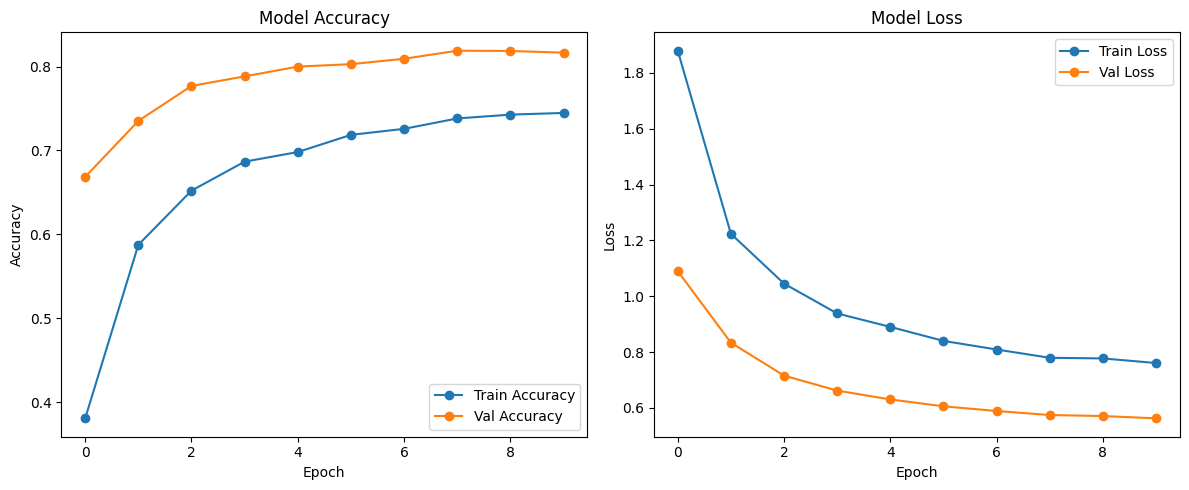

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import json
import os

# 🌟 Paths (Update if your folders change)
train_dir = '/content/dataset2/food_ml/training'
val_dir = '/content/dataset2/food_ml/validation'

# 📌 Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# ✅ Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# ✅ Auto-detect number of classes
NUM_CLASSES = len(train_generator.class_indices)
print(f"Detected {NUM_CLASSES} classes: {train_generator.class_indices}")

# ✅ Save class indices to JSON
with open('class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)

# ✅ Load DenseNet121 (pretrained)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_model.trainable = False  # Freeze base model initially

# ✅ Custom Top Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# ✅ Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ✅ Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('trained_densenet_model.h5', monitor='val_loss', save_best_only=True)

# ✅ Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

# ✅ Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
from google.colab import files
import tensorflow as tf
import json
import numpy as np
from tensorflow.keras.preprocessing import image

# ✅ Load model
model = tf.keras.models.load_model('/content/trained_densenet_model.h5')
print("Model loaded successfully!")

# ✅ Load class indices
with open('/content/drive/MyDrive/class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Reverse Mapping
class_labels = {v: k for k, v in class_indices.items()}

# ✅ Upload an image for testing
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# ✅ Load and preprocess image (size must match training size: 224x224)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ✅ Get prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_label = class_labels.get(predicted_class, "Unknown")

# ✅ Show result
print(f"Predicted Class Index: {predicted_class}")
print(f"Predicted Class Name: {predicted_label}")


Model loaded successfully!


Saving 9.jpg to 9 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Class Index: 6
Predicted Class Name: Noodles-Pasta
